In [1]:
%matplotlib inline
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import os
import pandas as pd
plt.style.use('seaborn')

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
def get_data(filename='Fremont.csv', url=URL):
    if not os.path.exists(filename):
        urlretrieve(url, filename)
        data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates=True)
        #data[data['Date'] > 2017]
        data.columns = ['West','East']
        data['Total'] = data['West'] + data['East']

        return data

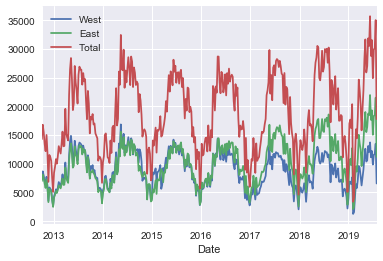

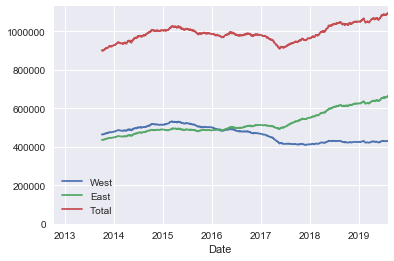

In [2]:
data = get_data()
data.resample('W').sum().plot()

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

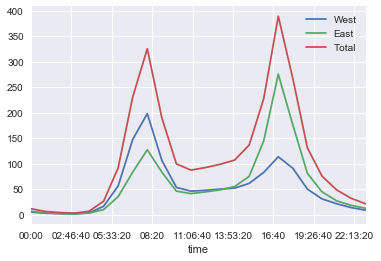

In [3]:
data.groupby(data.index.time).mean().plot()

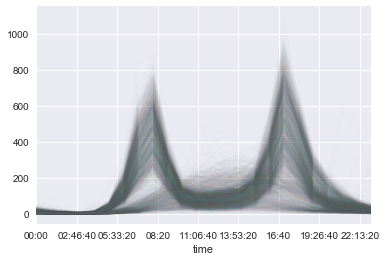

In [4]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]
pivoted.plot(legend=False, alpha =0.01)